In [1]:
# data: Iris with all Virginica class removed; https://archive.ics.uci.edu/ml/datasets/Iris
# Iris-setosa: 0, Iris-versicolor: 1
import numpy as np
import matplotlib.pyplot as plt
from FML.Logistic.prep import FL
from FML.Logistic.Logistic import LoR 
from FML.Logistic.Logistic_L2 import LoR_L2
trainfile = 'Logistic_train.csv'
testfile = 'Logistic_test.csv'
validfile = 'Logistic_validation.csv'
data_prep = FL('iris.data')
epochs = 500
step_size = 0.5
y_index = 4
#data_prep.prep(4, trainfile, testfile, validfile)

In [2]:
Logi = LoR(trainfile)
Logi.coef_SDG(y_index,epochs,step_size)
print('(no regularization) Error% = {}'.format(Logi.test(testfile)))

(no regularization) Error% = 0.0


In [3]:
Logi_L2 = LoR_L2(trainfile)
Logi_L2.coef_SDG(y_index,epochs,step_size,np.linspace(-0.01,0,10))
print('Best Lambda = {}'.format(Logi_L2.lamda[Logi_L2.validate(validfile)]))
print('(with regularization) Error% = {}'.format(Logi_L2.test(testfile)))

Best Lambda = -0.01
(with regularization) Error% = 0.5


(0.0, 1.05)

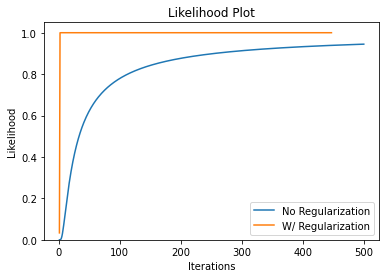

In [4]:
plt.figure(0)
plt.plot(np.linspace(1,epochs,epochs),Logi.Llhood, label = 'No Regularization')
plt.plot(np.linspace(1,epochs,epochs),Logi_L2.Llhood[Logi_L2.best_lambda], label = 'W/ Regularization')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Likelihood')
plt.title('Likelihood Plot')
plt.ylim(0,1.05)

In [5]:
#The graph shows that with regularization the Logistic regression was able to fit to the training data with less iteration than the unregularized version, seeing that the lambda chosen is negative, the penalty increase the step size making the regression process faster